In [6]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


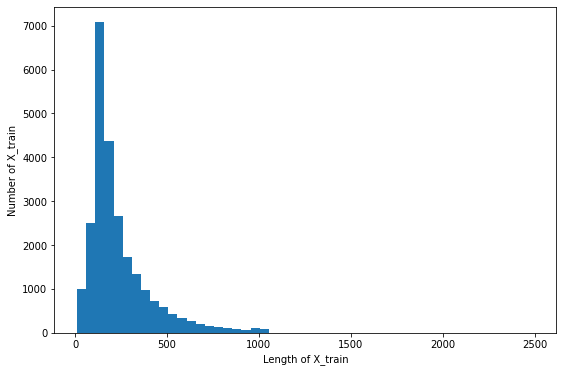

In [3]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train))/len(X_train))

plt.figure(figsize=(9,6))
plt.hist([len(L) for L in X_train], bins=50)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

In [4]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts=True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


In [8]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=10000 )
X_test = sequence.pad_sequences(X_test, maxlen=10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

In [9]:
print(X_train[0][:21])
print(X_train[0][9979:])
print(X_test[0][:21])
print(X_test[0][9979:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 226   65   16   38 1334   88   12   16  283    5   16 4472  113  103
   32   15   16 5345   19  178   32]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  14  286  170    8  157   46    5   27  239   16  179    2   38   32
   25 7944  451  202   14    6  717]


In [11]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[0])
print(y_train[:21])
print(y_test[:21])

1.0
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [13]:
from keras import models
from keras import layers

imdb = models.Sequential()
imdb.add(layers.Embedding(10000, 32, input_length=10000))

imdb.add(layers.Flatten())
imdb.add(layers.Dense(16))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1,activation='sigmoid'))

imdb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 32)         320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5120016   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 5,440,033
Trainable params: 5,440,033
Non-trainable params: 0
_________________________________________________________________


In [14]:
imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
%%time

Hist = imdb.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/50
500/500 [==============================] - 92s 182ms/step - loss: 1.1579 - accuracy: 0.6419 - val_loss: 0.2970 - val_accuracy: 0.8752
Epoch 2/50
500/500 [==============================] - 91s 182ms/step - loss: 0.1966 - accuracy: 0.9338 - val_loss: 0.2898 - val_accuracy: 0.8811
Epoch 3/50
500/500 [==============================] - 91s 182ms/step - loss: 0.0834 - accuracy: 0.9799 - val_loss: 0.3274 - val_accuracy: 0.8807
Epoch 4/50
500/500 [==============================] - 92s 183ms/step - loss: 0.0272 - accuracy: 0.9973 - val_loss: 0.3829 - val_accuracy: 0.8787
Epoch 5/50
500/500 [==============================] - 91s 183ms/step - loss: 0.0104 - accuracy: 0.9996 - val_loss: 0.4305 - val_accuracy: 0.8797
Epoch 6/50
500/500 [==============================] - 91s 183ms/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 0.4786 - val_accuracy: 0.8776
Epoch 7/50
500/500 [==============================] - 91s 182ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.5171 - val_ac

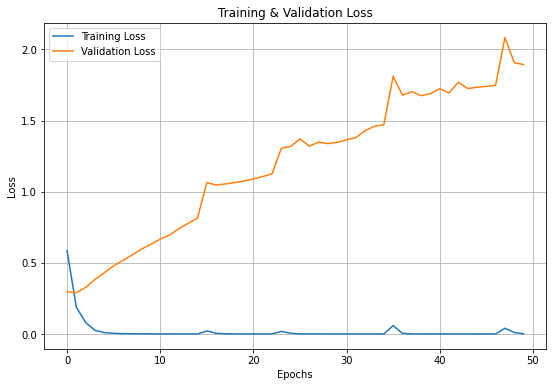

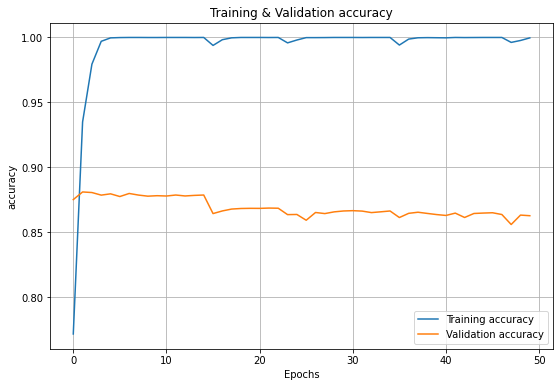

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize = (9, 6))
plt.plot( Hist.history['loss'])
plt.plot( Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot( Hist.history['accuracy'])
plt.plot(Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

In [18]:
loss, accuracy = imdb.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

782/782 [==============================] - 19s 25ms/step - loss: 1.8931 - accuracy: 0.8628
Loss = 1.89310
Accuracy = 0.86284
